# Prise en main des concepts du Deep Learning

<br/>

##### Arnaud Deleruyelle : Doctorant SIGMA - BioComputing
##### Encadrement: John Klein (SIGMA) - Cristian Versari (BioComputing)

## Partie 1 : Initialisation du code

Nous allons traiter ce travail à l'aide de la bibliothèque Tensorflow de Google. 
Cette partie va se consacrer à la gestion des imports, la création des données etc...

### Section 1.1: Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import sin

### Section 1.2: Création d'un dataset artificiel

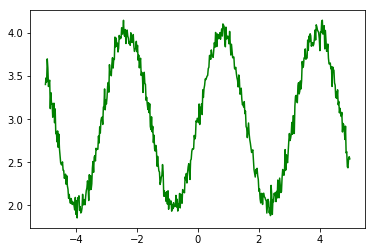

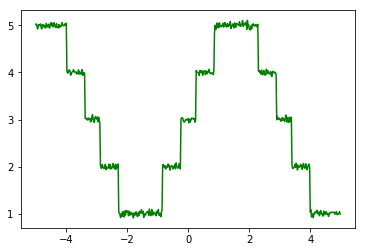

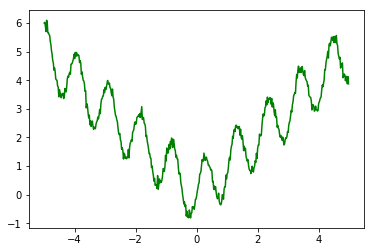

In [2]:
# dataset

def f_sin(x): return sin(2*x) + 3

def f_round(x): return round(2*sin(x) + 3)

def f_absin(x): return sin(6*x) + abs(x)


x_vals = np.arange(-5, 5, 0.02)
y_vals_f_sin = np.array([f_sin(x) + np.random.normal(0, 0.08) for x in x_vals])
y_vals_f_round = np.array([f_round(x) + np.random.normal(0, 0.04) for x in x_vals])
y_vals_f_absin = np.array([f_absin(x) + np.random.normal(0, 0.1) for x in x_vals])


nb_data = int(10 / 0.02)

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.show()

plt.plot(x_vals,y_vals_f_round, 'green')
plt.show()

plt.plot(x_vals,y_vals_f_absin, 'green')
plt.show()


### Section 1.3: Variables Globales

In [3]:
epochs = 20000
batch_size = 100

x = tf.placeholder(shape=[None, 1], dtype=tf.float64, name='x')
y = tf.placeholder(shape=[None, 1], dtype=tf.float64, name='y')

### Section 1.4: Fit

In [4]:
def Fit(x_vals,y_vals,model):
    sess = tf.Session()
    init_vars = tf.variables_initializer(tf.global_variables())
    sess.run(init_vars)
    for epoch in range(epochs):
        indices = np.random.choice(x_vals.shape[0], size=batch_size)
        x_batch = x_vals[indices].reshape((-1,1))
        x_batch = np.hstack([x_batch])
        y_batch = y_vals[indices].reshape((-1,1))
        feed_dict = {x: x_batch, y: y_batch}
        sess.run(model, feed_dict=feed_dict)
        if epoch%2000==0:
            print("Loss = ", sess.run(avg_llh, feed_dict=feed_dict))
    return sess

### Section 1.5: Predict

In [5]:
def Predict(x_vals,session):
    x_batch = np.hstack([x_vals.reshape((-1,1))])
    feed_dict = {x: x_batch}
    yh_vals = session.run((y_pred), feed_dict=feed_dict)
    return yh_vals

    

### Section 1.6: Test d'un modèle

In [6]:
# first layer
A1 = tf.Variable(np.random.rand(1,8), dtype=tf.float64)
b1 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l1_out = tf.tanh(tf.matmul(x, A1) + b1)

# second layer
A2 = tf.Variable(np.random.rand(8,8), dtype=tf.float64)
b2 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l2_out = tf.tanh(tf.matmul(l1_out, A2) + b2)

# third layer
A3 = tf.Variable(np.random.rand(8,1), dtype=tf.float64)
b3 = tf.Variable(np.random.rand(1), dtype=tf.float64)
l3_out = tf.matmul(l2_out, A3) + b3

# output layer
y_pred = l3_out

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
model = opt.minimize(avg_llh)

In [7]:
# fit the model
modelFit = Fit(x_vals,y_vals_f_sin,model)

Loss =  10.16922936129429
Loss =  0.25110073753945844
Loss =  0.00896111511524604
Loss =  0.006966363979931806
Loss =  0.00690920331954092
Loss =  0.0068332813276881284
Loss =  0.006178765754953079
Loss =  0.00926985259142924
Loss =  0.006318548577922623
Loss =  0.008787336766026938


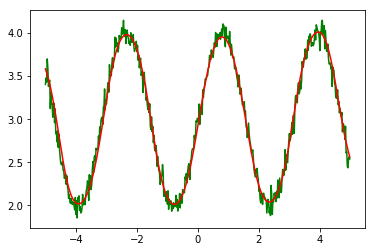

In [9]:
# predict 
modelPredict = Predict(x_vals,modelFit)

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.plot(x_vals,modelPredict, 'red')
plt.show()

## Partie 2: Utilisation des différentes fonctions d'activation.

Dans cette partie, nous allons étudier les 4 fonctions d'activation (Relu, sigmoide, tanh, identité).
Pour ce faire, nous avons choisi un optimiseur (Adam) de manière à ne changer que la couche d'activation.

### Section 2.1: fonction de test

In [10]:
# mse

def mse(y_pred,y):
    return np.mean(np.square(y_pred - y))

npArray1 = np.array([1,2,4])
npArray2 = np.array([1,3,7])

print("mse = " + str(mse(npArray1,npArray2)))

# mae

def mae(y_pred,y):
    return np.mean(np.abs(y_pred - y))

print("mae = " + str(mae(npArray1,npArray2)))

mse = 3.3333333333333335
mae = 1.3333333333333333


In [11]:
# test with mean of n launch

def testFunctionActivation(n, x_vals, y_vals, model):
    liste_result = []
    for i in range(n):
        session = Fit(x_vals, y_vals, model)
        y_result = Predict(x_vals,session)
        liste_result.append(y_result)
        session.close()
    result = np.mean(liste_result, axis = 0)
    return result.reshape(nb_data,)
        

### Section 2.2: Relu

In [12]:
# model with Relu

# first layer
A1 = tf.Variable(np.random.rand(1,8), dtype=tf.float64)
b1 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l1_out = tf.nn.relu(tf.matmul(x, A1) + b1)

# second layer
A2 = tf.Variable(np.random.rand(8,8), dtype=tf.float64)
b2 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l2_out = tf.nn.relu(tf.matmul(l1_out, A2) + b2)

# third layer
A3 = tf.Variable(np.random.rand(8,1), dtype=tf.float64)
b3 = tf.Variable(np.random.rand(1), dtype=tf.float64)
l3_out = tf.matmul(l2_out, A3) + b3

# output layer
y_pred = l3_out

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelRelu = opt.minimize(avg_llh)

In [13]:
# train model
resRelu_sin = testFunctionActivation(10,x_vals,y_vals_f_sin,modelRelu)
resRelu_round = testFunctionActivation(10,x_vals,y_vals_f_round,modelRelu)
resRelu_absin = testFunctionActivation(10,x_vals,y_vals_f_absin,modelRelu)

Loss =  385.7572116755058
Loss =  0.46644877806794055
Loss =  0.327955743638196
Loss =  0.38621324404677027
Loss =  0.21776909873148345
Loss =  0.1595700458087806
Loss =  0.1006709848765186
Loss =  0.037894255315147084
Loss =  0.01830023383287168
Loss =  0.016323615783282678
Loss =  435.98779803728803
Loss =  0.4155334269958443
Loss =  0.34451627691348485
Loss =  0.3176662052645694
Loss =  0.2822870149400598
Loss =  0.12322297786853753
Loss =  0.1645431542286618
Loss =  0.10021599257419812
Loss =  0.01651591673771179
Loss =  0.012988081584195786
Loss =  365.19586628325646
Loss =  0.43513383621066093
Loss =  0.4333965909387542
Loss =  0.3348905061748184
Loss =  0.24911957185002506
Loss =  0.08200349918671092
Loss =  0.15666914602134696
Loss =  0.14288250447810463
Loss =  0.012316297088705306
Loss =  0.013528727226820157
Loss =  444.7882575301299
Loss =  0.4555674801020592
Loss =  0.4325243168553054
Loss =  0.35736754846131846
Loss =  0.28487329512818393
Loss =  0.07533814946851633
Loss 

Loss =  0.3426865237970766
Loss =  0.34819386425195964


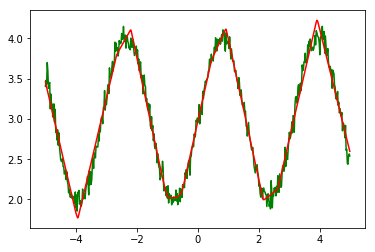

mae = 0.07989509937411844
mse = 0.010534556503348128


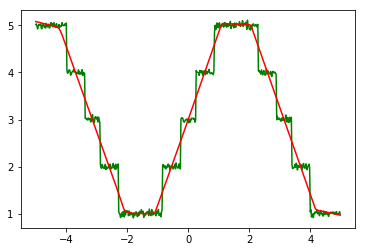

mae = 0.17934880659374522
mse = 0.05752074026642587


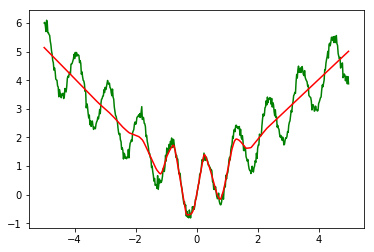

mae = 0.4775685927333253
mse = 0.3475837138623607


In [14]:
# print result

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.plot(x_vals,resRelu_sin, 'red')
plt.show()

print( "mae = " + str(mae(resRelu_sin,y_vals_f_sin)))
print( "mse = " + str(mse(resRelu_sin,y_vals_f_sin)))


plt.plot(x_vals,y_vals_f_round, 'green')
plt.plot(x_vals,resRelu_round, 'red')
plt.show()

print( "mae = " + str(mae(resRelu_round,y_vals_f_round)))
print( "mse = " + str(mse(resRelu_round,y_vals_f_round)))


plt.plot(x_vals,y_vals_f_absin, 'green')
plt.plot(x_vals,resRelu_absin, 'red')
plt.show()

print( "mae = " + str(mae(resRelu_absin,y_vals_f_absin)))
print( "mse = " + str(mse(resRelu_absin,y_vals_f_absin)))

### Section 2.3: Sigmoide

In [15]:
# model with sigmoid

# first layer
A1 = tf.Variable(np.random.rand(1,8), dtype=tf.float64)
b1 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l1_out = tf.nn.sigmoid(tf.matmul(x, A1) + b1)

# second layer
A2 = tf.Variable(np.random.rand(8,8), dtype=tf.float64)
b2 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l2_out = tf.nn.sigmoid(tf.matmul(l1_out, A2) + b2)

# third layer
A3 = tf.Variable(np.random.rand(8,1), dtype=tf.float64)
b3 = tf.Variable(np.random.rand(1), dtype=tf.float64)
l3_out = tf.matmul(l2_out, A3) + b3

# output layer
y_pred = l3_out

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelSigmoid = opt.minimize(avg_llh)

In [16]:
# train model
resSigmoid_sin = testFunctionActivation(10,x_vals,y_vals_f_sin,modelSigmoid)
resSigmoid_round = testFunctionActivation(10,x_vals,y_vals_f_round,modelSigmoid)
resSigmoid_absin = testFunctionActivation(10,x_vals,y_vals_f_absin,modelSigmoid)

Loss =  4.220904781971783
Loss =  0.345681266382188
Loss =  0.09009859263675712
Loss =  0.08178685697508659
Loss =  0.05541507734220115
Loss =  0.005362876155665135
Loss =  0.005923216036998371
Loss =  0.00665117840099275
Loss =  0.0054007600592090085
Loss =  0.006582471570984261
Loss =  4.82745025197831
Loss =  0.29231491374547075
Loss =  0.11795311075703245
Loss =  0.08485587497119448
Loss =  0.1088924576270467
Loss =  0.008300745350939703
Loss =  0.006867328909767114
Loss =  0.007549245029564677
Loss =  0.007069094784940051
Loss =  0.005676303914211298
Loss =  5.0230934192767664
Loss =  0.3096839609222674
Loss =  0.10605983769048972
Loss =  0.05979007470622525
Loss =  0.0761755717406171
Loss =  0.005867034311435066
Loss =  0.006701880612248241
Loss =  0.005699778103688857
Loss =  0.006698700492454259
Loss =  0.005725300216917344
Loss =  4.389330251508938
Loss =  0.3416626579579703
Loss =  0.12573167295841503
Loss =  0.056186671657210766
Loss =  0.0309970794836385
Loss =  0.007093186

Loss =  0.5189470660741486
Loss =  0.45377147949473035
Loss =  0.4803969508232637
Loss =  0.5019876035622263


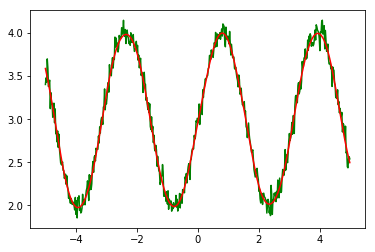

mae = 0.0620407924559486
mse = 0.005935050490859003


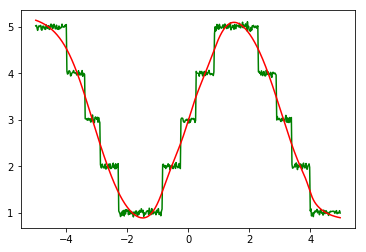

mae = 0.20210478557264894
mse = 0.06288823871055638


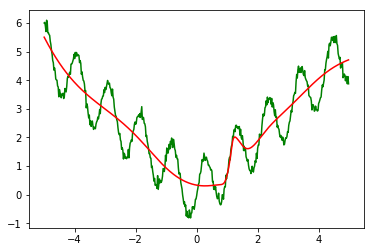

mae = 0.5975059626941701
mse = 0.46563874563188257


In [17]:
# print result

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.plot(x_vals,resSigmoid_sin, 'red')
plt.show()

print( "mae = " + str(mae(resSigmoid_sin,y_vals_f_sin)))
print( "mse = " + str(mse(resSigmoid_sin,y_vals_f_sin)))


plt.plot(x_vals,y_vals_f_round, 'green')
plt.plot(x_vals,resSigmoid_round, 'red')
plt.show()

print( "mae = " + str(mae(resSigmoid_round,y_vals_f_round)))
print( "mse = " + str(mse(resSigmoid_round,y_vals_f_round)))


plt.plot(x_vals,y_vals_f_absin, 'green')
plt.plot(x_vals,resSigmoid_absin, 'red')
plt.show()

print( "mae = " + str(mae(resSigmoid_absin,y_vals_f_absin)))
print( "mse = " + str(mse(resSigmoid_absin,y_vals_f_absin)))

### Section 2.4: Tanh

In [18]:
# model with tanh

# first layer
A1 = tf.Variable(np.random.rand(1,8), dtype=tf.float64)
b1 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l1_out = tf.nn.tanh(tf.matmul(x, A1) + b1)

# second layer
A2 = tf.Variable(np.random.rand(8,8), dtype=tf.float64)
b2 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l2_out = tf.nn.tanh(tf.matmul(l1_out, A2) + b2)

# third layer
A3 = tf.Variable(np.random.rand(8,1), dtype=tf.float64)
b3 = tf.Variable(np.random.rand(1), dtype=tf.float64)
l3_out = tf.matmul(l2_out, A3) + b3

# output layer
y_pred = l3_out

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelTanh = opt.minimize(avg_llh)

In [19]:
# train model
resTanh_sin = testFunctionActivation(10,x_vals,y_vals_f_sin,modelTanh)
resTanh_round = testFunctionActivation(10,x_vals,y_vals_f_round,modelTanh)
resTanh_absin = testFunctionActivation(10,x_vals,y_vals_f_absin,modelTanh)

Loss =  12.142488526563543
Loss =  0.09707374899215351
Loss =  0.08092632264571278
Loss =  0.08643277437913513
Loss =  0.006805801446527695
Loss =  0.008584563843173808
Loss =  0.00783638667606882
Loss =  0.007172005944279522
Loss =  0.006957295449913145
Loss =  0.005413325941226557
Loss =  9.42245614565887
Loss =  0.006263244788873321
Loss =  0.007041367232951856
Loss =  0.006751128523204174
Loss =  0.006530490334079364
Loss =  0.004880566983420031
Loss =  0.007395735723697765
Loss =  0.008041128541223406
Loss =  0.005360248163316833
Loss =  0.005545479891279463
Loss =  10.266331270174872
Loss =  0.005510826927908382
Loss =  0.0076409596585098535
Loss =  0.006486761055798424
Loss =  0.004416059247131674
Loss =  0.006524756721878299
Loss =  0.005396316979063354
Loss =  0.007253607611679075
Loss =  0.007206933858095279
Loss =  0.006516279356595972
Loss =  11.182753150274216
Loss =  0.11860451216187931
Loss =  0.06857636243712252
Loss =  0.0468324345406118
Loss =  0.035164800566075745
Lo

Loss =  0.33962321849887717
Loss =  0.31338793088348743
Loss =  0.23696775973314438
Loss =  0.2728056020816285
Loss =  0.2405245510269249
Loss =  0.23538227736328504


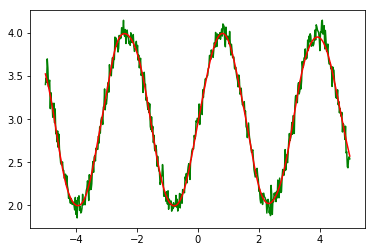

mae = 0.061731499802641546
mse = 0.006203829785174022


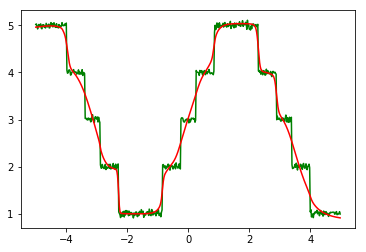

mae = 0.1375438564396413
mse = 0.03850509139956655


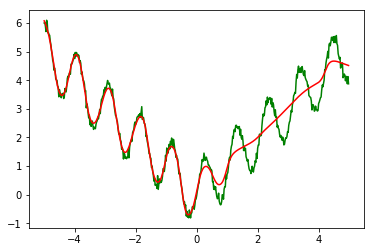

mae = 0.30560276244568874
mse = 0.18530743536358318


In [20]:
# print result

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.plot(x_vals,resTanh_sin, 'red')
plt.show()

print( "mae = " + str(mae(resTanh_sin,y_vals_f_sin)))
print( "mse = " + str(mse(resTanh_sin,y_vals_f_sin)))


plt.plot(x_vals,y_vals_f_round, 'green')
plt.plot(x_vals,resTanh_round, 'red')
plt.show()

print( "mae = " + str(mae(resTanh_round,y_vals_f_round)))
print( "mse = " + str(mse(resTanh_round,y_vals_f_round)))


plt.plot(x_vals,y_vals_f_absin, 'green')
plt.plot(x_vals,resTanh_absin, 'red')
plt.show()

print( "mae = " + str(mae(resTanh_absin,y_vals_f_absin)))
print( "mse = " + str(mse(resTanh_absin,y_vals_f_absin)))

### Section 2.4: Identité

In [21]:
# model without activation

# first layer
A1 = tf.Variable(np.random.rand(1,8), dtype=tf.float64)
b1 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l1_out = tf.matmul(x, A1) + b1

# second layer
A2 = tf.Variable(np.random.rand(8,8), dtype=tf.float64)
b2 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l2_out = tf.matmul(l1_out, A2) + b2

# third layer
A3 = tf.Variable(np.random.rand(8,1), dtype=tf.float64)
b3 = tf.Variable(np.random.rand(1), dtype=tf.float64)
l3_out = tf.matmul(l2_out, A3) + b3

# output layer
y_pred = l3_out

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelId = opt.minimize(avg_llh)

In [22]:
# train model
resId_sin = testFunctionActivation(10,x_vals,y_vals_f_sin,modelId)
resId_round = testFunctionActivation(10,x_vals,y_vals_f_round,modelId)
resId_absin = testFunctionActivation(10,x_vals,y_vals_f_absin,modelId)

Loss =  608.085556000669
Loss =  0.453357020585631
Loss =  0.510081742770399
Loss =  0.4657841984256175
Loss =  0.46425564629645066
Loss =  0.48921589565166274
Loss =  0.5427633731158336
Loss =  0.46710056900255154
Loss =  0.5013011837478594
Loss =  0.4921908637046539
Loss =  472.06946456710824
Loss =  0.4474334374736534
Loss =  0.4850310326629569
Loss =  0.4717843182639955
Loss =  0.4768775874106354
Loss =  0.4745523460659796
Loss =  0.5350809308278064
Loss =  0.4644967877703786
Loss =  0.4697280936296467
Loss =  0.4969072097931649
Loss =  488.8516417545118
Loss =  0.4204619655899166
Loss =  0.4311029459175997
Loss =  0.43761277250358743
Loss =  0.5306405221276485
Loss =  0.4680885159868631
Loss =  0.4887404034334783
Loss =  0.4376451280140744
Loss =  0.4311468541642725
Loss =  0.4654249312432184
Loss =  520.9714896126044
Loss =  0.4666808788938441
Loss =  0.45121835621443973
Loss =  0.43214762046449495
Loss =  0.4663649800985995
Loss =  0.43457092097192607
Loss =  0.46315681731937824

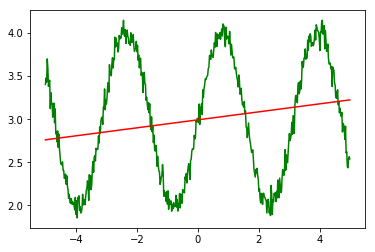

mae = 0.6091632657466064
mse = 0.4714233880022604


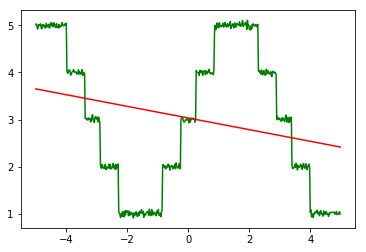

mae = 1.314682186792787
mse = 2.202300525551899


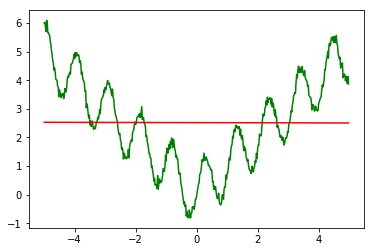

mae = 1.3474252753482747
mse = 2.601019371130212


In [23]:
# print result

plt.plot(x_vals,y_vals_f_sin, 'green')
plt.plot(x_vals,resId_sin, 'red')
plt.show()

print( "mae = " + str(mae(resId_sin,y_vals_f_sin)))
print( "mse = " + str(mse(resId_sin,y_vals_f_sin)))


plt.plot(x_vals,y_vals_f_round, 'green')
plt.plot(x_vals,resId_round, 'red')
plt.show()

print( "mae = " + str(mae(resId_round,y_vals_f_round)))
print( "mse = " + str(mse(resId_round,y_vals_f_round)))


plt.plot(x_vals,y_vals_f_absin, 'green')
plt.plot(x_vals,resId_absin, 'red')
plt.show()

print( "mae = " + str(mae(resId_absin,y_vals_f_absin)))
print( "mse = " + str(mse(resId_absin,y_vals_f_absin)))